In [13]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data_dir = 'data/datasets/dec_16_gens/test'
title = 'test'
gt_dir = os.path.join(data_dir, 'GT')
cotracker_dir = os.path.join(data_dir, 'cotracker')
pips_dir = os.path.join(data_dir, 'pips')

In [16]:
# os.listdir(cotracker_dir)
# os.listdir(pips_dir)

gt_coords = np.array(torch.load(os.path.join(gt_dir, title+'_pointvert_coords.pt')))
gt_vis = np.array(torch.load(os.path.join(gt_dir, title+'_pointvert_vis.pt')))

cotracker_coords = np.array(torch.load(os.path.join(cotracker_dir, title+'_cotracker_coords.pt')).cpu())
cotracker_vis = np.array(torch.load(os.path.join(cotracker_dir, title+'_cotracker_vis.pt')).cpu())

pips_coords = np.array(torch.load(os.path.join(pips_dir, title+'_pips_coords.pt')).cpu())

In [43]:
# # print(len(gt_coords), len(gt_vis), len(cotracker_coords), len(cotracker_vis))
# print(gt_coords.shape, gt_vis.shape, cotracker_coords.shape, cotracker_vis.shape)
# print(gt_coords[:,0,0].shape)

(11, 2, 2) (11, 2) (11, 2, 2) (11, 2)
(11,)


In [55]:
# num_frames = gt_coords.shape[0]
# num_points = gt_coords.shape[1]


11 2


In [139]:
# print((gt_coords.reshape(gt_coords.shape[0]*gt_coords.shape[1],2)).shape)
# print(gt_vis.shape)
# gt_coords[gt_vis,:].shape

(22, 2)
(11, 2)


(14, 2)

In [125]:
# point = 0

# point_gt_coords = gt_coords[:,point,:]
# point_gt_vis = gt_vis[:,point]

# print(point_gt_coords[point_gt_vis,:])

# point = 1

# point_gt_coords = gt_coords[:,point,:]
# point_gt_vis = gt_vis[:,point]

# print(point_gt_coords[point_gt_vis,:])

[[215 183]
 [156 163]
 [ 92 141]
 [ 60 128]
 [125 139]
 [228 162]
 [277 180]
 [282 208]]
[[248 179]
 [190 161]
 [139 143]
 [132 140]
 [202 160]
 [277 181]]


In [127]:
# print(gt_coords.shape)
# print(gt_vis.shape)

# print(gt_coords[gt_vis,:].shape)
# print(gt_coords[gt_vis,:])

# print(gt_coords[gt_vis,:].shape, cotracker_coords[gt_vis,:].shape)

(11, 2, 2)
(11, 2)
(14, 2)
[[215 183]
 [248 179]
 [156 163]
 [190 161]
 [ 92 141]
 [139 143]
 [ 60 128]
 [132 140]
 [125 139]
 [202 160]
 [228 162]
 [277 181]
 [277 180]
 [282 208]]
(14, 2) (14, 2)


In [142]:
# gt_coords[gt_vis,:]

array([[215, 183],
       [248, 179],
       [156, 163],
       [190, 161],
       [ 92, 141],
       [139, 143],
       [ 60, 128],
       [132, 140],
       [125, 139],
       [202, 160],
       [228, 162],
       [277, 181],
       [277, 180],
       [282, 208]])

In [17]:
def euclid_dist(gt_coords, cotracker_coords):
    # euclid distance of point coord in all frames
    squared_diff = np.sum((gt_coords - cotracker_coords) ** 2, axis=1)
    euclidean_distances = np.sqrt(squared_diff)
    total_distance = euclidean_distances.mean()

    return total_distance

def vis_accuracy(gt_visibility, predicted_visibility):
    # Counting the number of times the predicted visibility matches the ground truth
    correct_predictions = np.sum(gt_visibility == predicted_visibility)
    total_predictions = gt_visibility.size
    accuracy = (correct_predictions / total_predictions) * 100
    
    return accuracy



In [18]:
track_id = 0

track_gt_coords = gt_coords[:,track_id,:]
track_gt_vis = gt_vis[:,track_id]
track_cotracker_coords = cotracker_coords[:,track_id,:]
track_cotracker_vis = cotracker_vis[:,track_id]>0.1

print("track id: ", track_id)
print("percent of correctly predicted visibility scores:", vis_accuracy(track_gt_vis, track_cotracker_vis))
print("total summed euclid dist", euclid_dist(track_gt_coords, track_cotracker_coords))

print("euclid dist of visible points: ", euclid_dist(track_gt_coords[track_gt_vis,:], track_cotracker_coords[track_gt_vis,:]))
print("euclid dist of NOT visible points: ", euclid_dist(track_gt_coords[~track_gt_vis,:], track_cotracker_coords[~track_gt_vis,:]))

track_id = 1

track_gt_coords = gt_coords[:,track_id,:]
track_gt_vis = gt_vis[:,track_id]
track_cotracker_coords = cotracker_coords[:,track_id,:]
track_cotracker_vis = cotracker_vis[:,track_id]>0.1

print("track id: ", track_id)
print("percent of correctly predicted visibility scores:", vis_accuracy(track_gt_vis, track_cotracker_vis))
print("total summed euclid dist", euclid_dist(track_gt_coords, track_cotracker_coords))

print("euclid dist of visible points: ", euclid_dist(track_gt_coords[track_gt_vis,:], track_cotracker_coords[track_gt_vis,:]))
print("euclid dist of NOT visible points: ", euclid_dist(track_gt_coords[~track_gt_vis,:], track_cotracker_coords[~track_gt_vis,:]))

track id:  0
percent of correctly predicted visibility scores: 54.54545454545454
total summed euclid dist 43.94380549259614
euclid dist of visible points:  37.73509619958237
euclid dist of NOT visible points:  60.500363607299505
track id:  1
percent of correctly predicted visibility scores: 90.9090909090909
total summed euclid dist 32.537348672539885
euclid dist of visible points:  19.532394490738508
euclid dist of NOT visible points:  48.14329369070154


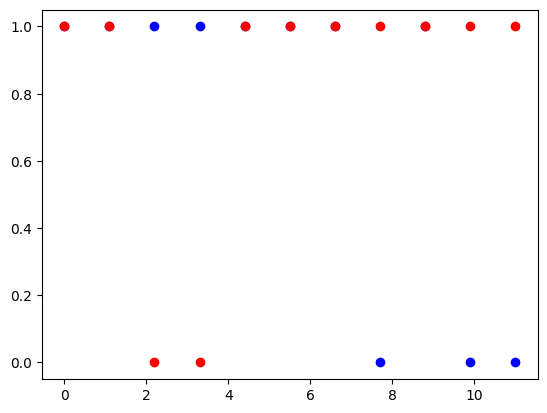

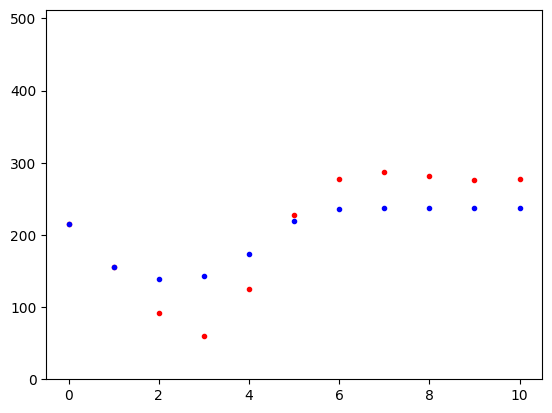

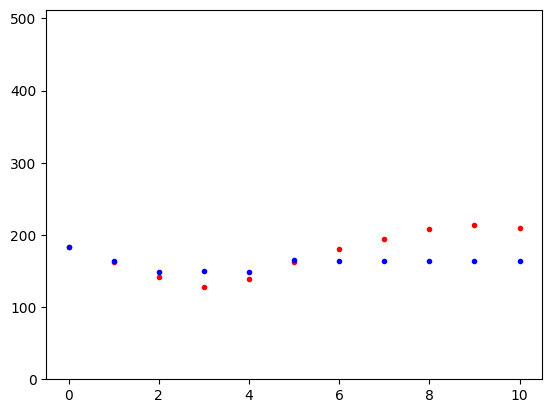

In [164]:
plt.scatter(np.linspace(0,11,11), gt_vis[:,0], c='b')
plt.scatter(np.linspace(0,11,11), cotracker_vis[:,0], c='r')
plt.show()

plt.plot(gt_coords[:,0,0], 'r.')
plt.plot(cotracker_coords[:,0,0], 'b.')
plt.ylim(0, 512)
plt.show()

plt.plot(gt_coords[:,0,1], 'r.')
plt.plot(cotracker_coords[:,0,1], 'b.')
plt.ylim(0, 512)
plt.show()